# Exploration données

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
cd .

/Users/emilien/Documents/spacious/notebooks


## Charger les données

In [76]:
corpus = pd.read_csv("../data/processed/tableau.csv") # lire le fichier
corpus["date"] = pd.to_datetime(corpus["Date_mod"]) # transformer la colonne date en format date
corpus = corpus[corpus["Contenu_mod"].notna()]
len(corpus)

871

## Recoder

In [77]:
def recodage(texte):
    """
    Fonction de recodage
    """
    if "Parisien" in texte:
        return "Le Parisien"
    if "Moniteur" in texte:
        return "Le Moniteur"
    return texte

corpus["journal"] = corpus["Journal_mod"].apply(recodage)

## Explorer les données

### Elements manquants

In [71]:
corpus["Contenu_mod"].isna().sum()

7

In [72]:
corpus["Titre_mod"].isna().sum()

0

### Evolution du nombre d'articles

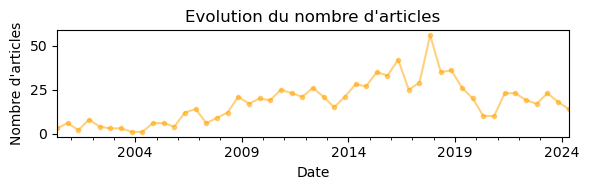

In [47]:
nb_article_jour = corpus.resample("6m", on="date")["Date_raw"].count()
nb_article_jour.plot(figsize=(6,2), style=".-", color="orange", alpha=0.5)
plt.title("Evolution du nombre d'articles")
plt.ylabel("Nombre d'articles")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("courbe.png")

### Distribution des journaux

<Axes: >

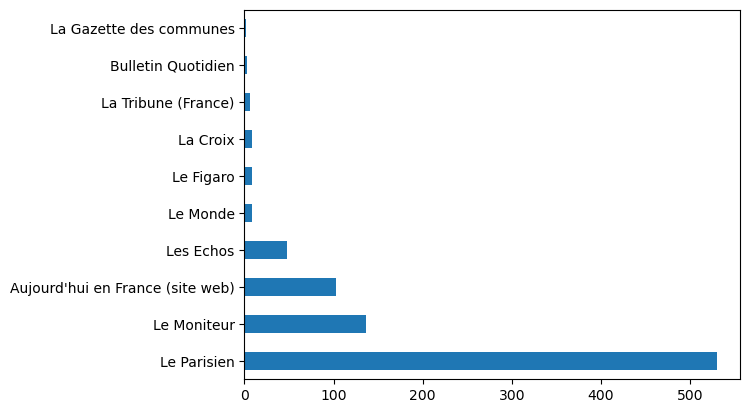

In [63]:
corpus["journal"].value_counts()[0:10].plot(kind="barh")

## Mise en forme de données

### Sortie pour Iramuteq

In [94]:
with open("sortie_iramuteq.txt", "w") as fichier:
    for i,row in corpus.iterrows():
        texte = row["Titre_mod"] + "\n" + row["Contenu_mod"]
        texte = texte.replace("*", " ").replace("\n"," ")
        article = f"\n\n**** *{row['journal'].replace(' ','_')} *{row['date'].year}\n\n{texte}"
        fichier.write(article)

## Analyses

### Analyse 1 : présence de la vallée

<Axes: >

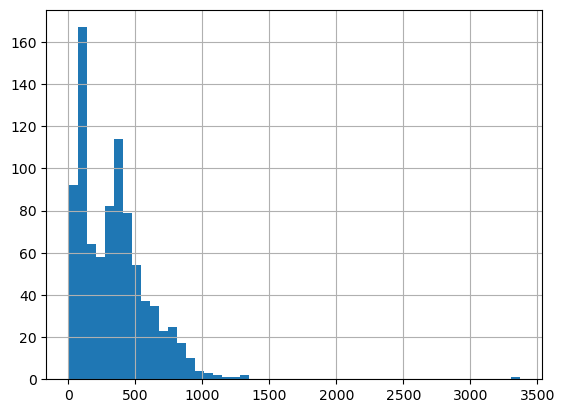

In [108]:
def compter_mots(texte):
    return len(texte.split(" "))

corpus["Contenu_mod"].apply(compter_mots).hist(bins=50)

In [113]:
def compter_frequence_mot(texte, x):
    """
    Compter la fréquence d'un mot `x``

    """
    return texte.count(x)
    
corpus["nb_vallée"] = corpus["Contenu_mod"].apply(lambda texte : compter_frequence_mot(texte, "vallée"))

In [130]:
corpus["nb_vallée"].value_counts()

0    775
1     80
2     15
4      1
Name: nb_vallée, dtype: int64

In [126]:
#corpus[corpus["nb_vallée"]>0].iloc[0]["Contenu_mod"]

### Analyse 2 : entités géographiques